In [3]:
import pandas as pd
import numpy as np
import datetime
import optuna
import math

# Read datasets and basic pre-processing

In [4]:
df1 = pd.read_csv('data_november23_february24_openmeteo-hour.csv', index_col='datetime', parse_dates=True, infer_datetime_format=True)
df2 = pd.read_csv('data_april24_may24_openmeteo-hour.csv', index_col='datetime', parse_dates=True, infer_datetime_format=True)
df3 = pd.read_csv('data_june24_1_openmeteo-hour.csv', index_col='datetime', parse_dates=True, infer_datetime_format=True)

C:\Users\tsiop\AppData\Local\Temp\ipykernel_13904\704980418.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1 = pd.read_csv('data_november23_february24_openmeteo-hour.csv', index_col='datetime', parse_dates=True, infer_datetime_format=True)
C:\Users\tsiop\AppData\Local\Temp\ipykernel_13904\704980418.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2 = pd.read_csv('data_april24_may24_openmeteo-hour.csv', index_col='datetime', parse_dates=True, infer_datetime_format=True)
C:\Users\tsiop\AppData\Local\Temp\ipykernel_13904\704980418.py:3: Future

In [5]:
df = pd.concat([df1,df2,df3])
df.shape

(3206, 38)

In [6]:
df.columns

Index(['inverter1', 'inverter2', 'inverter3', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'sunshine_duration (s)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'global_tilted_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)',
       'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith',
       'Gpoa (W/m²)', 'energy1', 'energy2', 'energy3', 'error1', 'error2',
       'error3'],
      dtype='object')

In [7]:
df = df.drop(['time', 'Gpoa (W/m²)', 'energy1', 'energy2', 'energy3', 'error1', 'error2', 'error3'],axis=1)

In [8]:
df.columns

Index(['inverter1', 'inverter2', 'inverter3', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'sunshine_duration (s)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'global_tilted_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)',
       'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith'],
      dtype='object')

In [9]:
df1 = df.reset_index()[['datetime', 'inverter1', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'sunshine_duration (s)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'global_tilted_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)',
       'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith']]

df2 = df.reset_index()[['datetime', 'inverter2', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'sunshine_duration (s)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'global_tilted_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)',
       'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith']]

df3 = df.reset_index()[['datetime', 'inverter3', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'sunshine_duration (s)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'global_tilted_irradiance (W/m²)', 'terrestrial_radiation (W/m²)',
       'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)',
       'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith']]

In [10]:
df1['id'] = 'inverter1'
df1 = df1.rename({'inverter1':'inverter'},axis=1)
df1['panel_size'] = 63*1.7*1
df1['inverter'] = df1['inverter'].fillna(0)

df2['id'] = 'inverter2'
df2 = df2.rename({'inverter2':'inverter'},axis=1)
df2['panel_size'] = 56*1.7*1
df2['inverter'] = df2['inverter'].fillna(0)

df3['id'] = 'inverter3'
df3 = df3.rename({'inverter3':'inverter'},axis=1)
df3['panel_size'] = 34*1.7*1
df3['inverter'] = df3['inverter'].fillna(0)

In [11]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df

,datetime,inverter,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),...,terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,id,panel_size
0,2023-11-03 02:00:00,0.000000,19.6,76.0,20.4,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-67,141,inverter1,107.1
1,2023-11-03 03:00:00,0.000000,19.2,75.0,19.8,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-80,129,inverter1,107.1
2,2023-11-03 04:00:00,0.000000,17.9,80.0,18.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-89,117,inverter1,107.1
3,2023-11-03 05:00:00,0.000000,17.4,75.0,17.6,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-98,105,inverter1,107.1
4,2023-11-03 06:00:00,0.000000,16.9,71.0,17.1,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-106,93,inverter1,107.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,2024-06-25 19:00:00,170.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,385.0,NaN,NaN,NaN,NaN,255.3,61,90,inverter3,57.8
9614,2024-06-25 20:00:00,2.641667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.7,NaN,NaN,NaN,NaN,0.2,52,100,inverter3,57.8
9615,2024-06-25 21:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,41,109,inverter3,57.8
9616,2024-06-25 22:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,28,116,inverter3,57.8


In [12]:
df = df.dropna(subset=['temperature_2m (°C)'])
df

,datetime,inverter,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),...,terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,id,panel_size
0,2023-11-03 02:00:00,0.0,19.6,76.0,20.4,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-67,141,inverter1,107.1
1,2023-11-03 03:00:00,0.0,19.2,75.0,19.8,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-80,129,inverter1,107.1
2,2023-11-03 04:00:00,0.0,17.9,80.0,18.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-89,117,inverter1,107.1
3,2023-11-03 05:00:00,0.0,17.4,75.0,17.6,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-98,105,inverter1,107.1
4,2023-11-03 06:00:00,0.0,16.9,71.0,17.1,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-106,93,inverter1,107.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024-06-24 22:00:00,0.0,26.6,71.0,28.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,116,inverter3,57.8
9593,2024-06-24 23:00:00,0.0,25.9,68.0,27.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14,120,inverter3,57.8
9594,2024-06-25 00:00:00,0.0,25.2,65.0,26.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2,121,inverter3,57.8
9595,2024-06-25 01:00:00,0.0,24.8,63.0,25.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-18,119,inverter3,57.8


# Optuna for energy model

https://www.scribd.com/document/286923684/Deration-Factor

In [33]:
def metric(y_true, y_pred):
    mape = (np.abs(y_pred - y_true) / np.abs(y_true)).map(lambda x: 0 if math.isnan(x) else x)
    mape = mape.map(lambda x: 1 if math.isinf(x) else x)
    res = 100 * np.mean(mape)
                        #.map(lambda x: x if x<100 else 0))
    
    print(f"MAPE ML Model: {res}")   
    
    res = 100 * np.mean((np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))).map(lambda x: 0 if math.isnan(x) else x))
                        #.map(lambda x: x if x<100 else 0))
    
    print(f"SMAPE ML Model: {res}")   

def calculate_energy(DNI, DHI, GHI, thz, gs, air_temp, panel_size, panel_age, performance_ratio, system_losses) :
    
    b = 17 # surface tilt angle in degrees
    g = -39 # surface azimuth angle in degrees
    albedo = 0.2 # ground reflectance (default value)
    
    # Convert degrees to radians
    thz_rad = math.radians(thz)
    b_rad = math.radians(b)
    gs_rad = math.radians(gs)
    g_rad = math.radians(g)
    
    # Calculate the angle of incidence th
    cos_th = (math.sin(thz_rad) * math.cos(gs_rad - g_rad) * math.sin(b_rad) + math.cos(thz_rad) * math.cos(b_rad))
    
    # Ensure cos_th is within the valid range
    cos_th = max(0, min(cos_th, 1))
    
    # Direct component
    Gpoa_direct = DNI * cos_th
    
    # Diffuse component (assumed isotropic)
    Gpoa_diffuse = DHI * (1 + math.cos(b_rad)) / 2
    
    # Reflected component
    Gpoa_reflected = GHI * albedo * (1 - math.cos(b_rad)) / 2
    
    # Total Gpoa
    Gpoa = Gpoa_direct + Gpoa_diffuse + Gpoa_reflected
    
    # Global constants
    Eo = 1000  # Reference Irradiance (W/m²)
    To = 25  # Reference Temperature (°C)
    g = -0.0042  # Power Temperature Coefficient (%/°C)
    Pmp0 = 270  # PV module rated power (Wp)
    
    # Derating factors
    Soiling = 1
    Shading = 0
    Snow = 0
    Mismatch = 1
    Wiring = 1
    Connections = 0.5
    LID = 0
    Nameplate = 1
    Age = panel_age
    Availability = 3
    a = -3.47  # Thermal Properties Isc (%/K)
    b = -0.0594  # Thermal Properties Voc (%/K)
    
    # NOCT (Nominal Operating Cell Temperature)
    NOCT = 48
    
    # Insolation in mW/cm²
    S = 80
    
    # Calculate derating factor
    Deratingfactor = (Soiling + Shading + Snow + Mismatch + Wiring + Connections + 
                      LID + Nameplate + Age + Availability + a + b)
    
    # Calculate module temperature
    Tm = air_temp + ((NOCT - 20) / 80) * S
    
    # Calculate predicted power production
    if Gpoa >= 125:
        p = ((Gpoa / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    else:
        p = ((0.008 * (Gpoa ** 2) / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    
    if p < 1:
        p = 0
    
    # System losses and performance ratio adjustments
    s1 = (100 - system_losses) / 100
    s2 = 1 - ((100 - performance_ratio) / 100)
    
    # Calculate energy output
    energy = panel_size * p * s1 * s2
    
    return energy

In [83]:
def calculate_energy(DNI, DHI, GHI, thz, gs, air_temp, panel_size, performance_ratio, system_losses, g, 
                     nameplate, inverter_transformer, mismatch, connections, dc_wiring, ac_wiring, soiling, availability, shading, sun_tracking, age):
    
    derating_factor = nameplate*inverter_transformer*mismatch*connections*dc_wiring*ac_wiring*soiling*availability*shading*sun_tracking*age
        
    b = 17 # surface tilt angle in degrees
    #g = -39 # surface azimuth angle in degrees
    albedo = 0.2 # ground reflectance (default value)
    
    # Convert degrees to radians
    thz_rad = math.radians(thz)
    b_rad = math.radians(b)
    gs_rad = math.radians(gs)
    g_rad = math.radians(g)
    
    # Calculate the angle of incidence th
    cos_th = (math.sin(thz_rad) * math.cos(gs_rad - g_rad) * math.sin(b_rad) + math.cos(thz_rad) * math.cos(b_rad))
    
    # Ensure cos_th is within the valid range
    cos_th = max(0, min(cos_th, 1))
    
    # Direct component
    Gpoa_direct = DNI * cos_th
    
    # Diffuse component (assumed isotropic)
    Gpoa_diffuse = DHI * (1 + math.cos(b_rad)) / 2
    
    # Reflected component
    Gpoa_reflected = GHI * albedo * (1 - math.cos(b_rad)) / 2
    
    # Total Gpoa
    Gpoa = Gpoa_direct + Gpoa_diffuse + Gpoa_reflected
    
    # Global constants
    Eo = 1000  # Reference Irradiance (W/m²)
    To = 25  # Reference Temperature (°C)
    g = -0.0042  # Power Temperature Coefficient (%/°C)
    Pmp0 = 270  # PV module rated power (Wp)
    
    # NOCT (Nominal Operating Cell Temperature)
    NOCT = 48
    
    # Insolation in mW/cm²
    S = 80
    
    # Calculate module temperature
    Tm = air_temp + ((NOCT - 20) / 80) * S
    
    # Calculate predicted power production
    if Gpoa >= 125:
        p = ((Gpoa / Eo) * Pmp0 * (1 + g * (Tm - To))) * derating_factor
    else:
        p = ((0.008 * (Gpoa ** 2) / Eo) * Pmp0 * (1 + g * (Tm - To))) * derating_factor
    
    if p < 1:
        p = 0
    
    # System losses and performance ratio adjustments
    s1 = (100 - system_losses) / 100
    s2 = 1 - ((100 - performance_ratio) / 100)
    
    # Calculate energy output
    energy = panel_size * p * s1 * s2
    
    return energy

In [84]:
def smape(y_true,y_pred) :
    return 100 * np.mean((np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))).map(lambda x: 0 if math.isnan(x) else x))

In [94]:
def _(doc):
    return doc

def objective(trial):
    
    performance_ratio = trial.suggest_float('performance_ratio', 70, 100) # = 79.26 # (%)
    system_losses = trial.suggest_float('system_losses', 5, 20) # = 12 # (%) around x% (10.7+3.6, 10.7+2.7, 5.9+3.6)
    
    g = trial.suggest_int('g', -180, 180)
    
    nameplate = trial.suggest_float('nameplate', 0.80, 1.05)
    inverter_transformer = trial.suggest_float('inverter_transformer', 0.88, 0.98)
    mismatch = trial.suggest_float('mismatch', 0.97, 0.995)
    connections = trial.suggest_float('connections', 0.99, 0.997)
    dc_wiring = trial.suggest_float('dc_wiring', 0.97, 0.99)
    ac_wiring = trial.suggest_float('ac_wiring', 0.98, 0.993)
    soiling = trial.suggest_float('soiling', 0.30, 0.995)
    availability = trial.suggest_float('availability', 0, 0.995)
    shading = trial.suggest_float('shading', 0, 1)
    sun_tracking = trial.suggest_float('sun_tracking', 0.95, 1)
    age = trial.suggest_float('age', 0.70, 1)
    
    df['energy'] = df.apply(lambda x: calculate_energy(x['direct_normal_irradiance (W/m²)'], 
                                                       x['diffuse_radiation (W/m²)'], x['shortwave_radiation (W/m²)'], 
                                                       x['zenith'], x['azimuth'], x['temperature_2m (°C)'],
                                                       x['panel_size'], 
                                                       performance_ratio=performance_ratio, 
                                                       system_losses=system_losses, g=g,
                                                       nameplate=nameplate, inverter_transformer=inverter_transformer,
                                                       mismatch=mismatch, connections=connections, dc_wiring=dc_wiring,
                                                       ac_wiring=ac_wiring, soiling=soiling, availability=availability,
                                                       shading=shading, sun_tracking=sun_tracking, age=age), axis=1)

    score = smape(df['inverter'],df['energy'])

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500, n_jobs = -1, show_progress_bar=True)

print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-07-09 15:38:45,139] A new study created in memory with name: no-name-c93fa081-14c3-48ec-90aa-6112c0f30449


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-07-09 15:38:45,637] Trial 0 finished with value: 49.58335232861209 and parameters: {'performance_ratio': 97.99497990011727, 'system_losses': 6.4617171996915665, 'g': 139, 'nameplate': 1.039505326131237, 'inverter_transformer': 0.9686427353637649, 'mismatch': 0.9944134732569315, 'connections': 0.9928663691660986, 'dc_wiring': 0.9794325283307437, 'ac_wiring': 0.9923376490193504, 'soiling': 0.42747683620857135, 'availability': 0.11133882872951424, 'shading': 0.13878910522623178, 'sun_tracking': 0.9903725258732154, 'age': 0.706671124388019}. Best is trial 0 with value: 49.58335232861209.
[I 2024-07-09 15:38:45,855] Trial 1 finished with value: 31.47106640509382 and parameters: {'performance_ratio': 99.76369678554369, 'system_losses': 14.75395177910985, 'g': -164, 'nameplate': 0.9601252052883673, 'inverter_transformer': 0.9751367839120995, 'mismatch': 0.973354222811962, 'connections': 0.9933458432357827, 'dc_wiring': 0.9839139451826785, 'ac_wiring': 0.9883500431065234, 'soiling': 0.

[I 2024-07-09 15:38:51,654] Trial 13 finished with value: 49.04731853994671 and parameters: {'performance_ratio': 92.75297940935187, 'system_losses': 7.824785767953694, 'g': -64, 'nameplate': 0.887105672317967, 'inverter_transformer': 0.8805111418661392, 'mismatch': 0.9936660486878295, 'connections': 0.9931131024037907, 'dc_wiring': 0.974703329342682, 'ac_wiring': 0.9894487845740829, 'soiling': 0.662738798130613, 'availability': 0.24853570453338927, 'shading': 0.12452868580514598, 'sun_tracking': 0.9650485688500955, 'age': 0.8352233618620991}. Best is trial 20 with value: 22.60172902944834.
[I 2024-07-09 15:38:51,658] Trial 21 finished with value: 24.43122291220804 and parameters: {'performance_ratio': 79.20301676623542, 'system_losses': 19.979755481175445, 'g': -51, 'nameplate': 0.8047248895492735, 'inverter_transformer': 0.8816133614540304, 'mismatch': 0.9771013421901205, 'connections': 0.9919278654074882, 'dc_wiring': 0.9873565764852125, 'ac_wiring': 0.9856484088434126, 'soiling': 0

[I 2024-07-09 15:38:56,572] Trial 30 finished with value: 22.789403674155245 and parameters: {'performance_ratio': 88.29918533921209, 'system_losses': 18.24288584547665, 'g': -42, 'nameplate': 0.857043386517747, 'inverter_transformer': 0.8954523165466766, 'mismatch': 0.979959049957709, 'connections': 0.9909272517462194, 'dc_wiring': 0.9870115182908227, 'ac_wiring': 0.987062552765526, 'soiling': 0.8893083652432374, 'availability': 0.9792522545979485, 'shading': 0.9890431530600814, 'sun_tracking': 0.9998042810301493, 'age': 0.784530169865933}. Best is trial 20 with value: 22.60172902944834.
[I 2024-07-09 15:38:57,117] Trial 28 finished with value: 25.052305283931027 and parameters: {'performance_ratio': 78.49490254712585, 'system_losses': 19.91396736074841, 'g': 54, 'nameplate': 0.8000781643417849, 'inverter_transformer': 0.8977535022948387, 'mismatch': 0.9804229363680037, 'connections': 0.991463640922408, 'dc_wiring': 0.9869754021263344, 'ac_wiring': 0.9848700237194608, 'soiling': 0.876

[I 2024-07-09 15:39:02,384] Trial 45 finished with value: 25.148688314446222 and parameters: {'performance_ratio': 82.49691082283917, 'system_losses': 17.025736876235587, 'g': -126, 'nameplate': 0.8246772795355326, 'inverter_transformer': 0.8889672836949551, 'mismatch': 0.9743695092153692, 'connections': 0.9907042040911157, 'dc_wiring': 0.9849181845911721, 'ac_wiring': 0.990409854642869, 'soiling': 0.9538005916463078, 'availability': 0.7653602431003299, 'shading': 0.8785575122450977, 'sun_tracking': 0.9938543677080622, 'age': 0.7552725648852845}. Best is trial 20 with value: 22.60172902944834.
[I 2024-07-09 15:39:02,484] Trial 40 finished with value: 27.883102402493048 and parameters: {'performance_ratio': 81.32458790485585, 'system_losses': 17.152738982932416, 'g': 67, 'nameplate': 0.8346166590364651, 'inverter_transformer': 0.8963302686352064, 'mismatch': 0.9810429210477698, 'connections': 0.9921644172301715, 'dc_wiring': 0.9868468133925596, 'ac_wiring': 0.9879580027771975, 'soiling'

[I 2024-07-09 15:39:08,116] Trial 55 finished with value: 23.929128775707508 and parameters: {'performance_ratio': 85.14191632451042, 'system_losses': 14.608279118687467, 'g': -16, 'nameplate': 0.8696485578486453, 'inverter_transformer': 0.9227669590026044, 'mismatch': 0.9839521690890892, 'connections': 0.9926561073636714, 'dc_wiring': 0.983952478913052, 'ac_wiring': 0.9865634538468885, 'soiling': 0.9948582479632314, 'availability': 0.8061565586425036, 'shading': 0.9392537656017559, 'sun_tracking': 0.9890420789743019, 'age': 0.8545093303400395}. Best is trial 20 with value: 22.60172902944834.
[I 2024-07-09 15:39:08,323] Trial 58 finished with value: 23.38467009007747 and parameters: {'performance_ratio': 85.56657166767519, 'system_losses': 14.768660625186234, 'g': -20, 'nameplate': 0.8711413149615839, 'inverter_transformer': 0.9217518776492494, 'mismatch': 0.9830762063326508, 'connections': 0.9928855053155534, 'dc_wiring': 0.9882994002897588, 'ac_wiring': 0.9864921861912939, 'soiling':

[I 2024-07-09 15:39:14,385] Trial 73 finished with value: 21.427646565231026 and parameters: {'performance_ratio': 90.60921818526936, 'system_losses': 11.756987645106868, 'g': -79, 'nameplate': 0.9017530845345378, 'inverter_transformer': 0.9106967607501265, 'mismatch': 0.982825520165935, 'connections': 0.9932730392251079, 'dc_wiring': 0.9898121680329146, 'ac_wiring': 0.9847920286698255, 'soiling': 0.9616130038281386, 'availability': 0.9254057731309775, 'shading': 0.7527315189212798, 'sun_tracking': 0.9853901640909365, 'age': 0.8413217035875827}. Best is trial 73 with value: 21.427646565231026.
[I 2024-07-09 15:39:14,718] Trial 72 finished with value: 27.587361901316903 and parameters: {'performance_ratio': 90.70312880592117, 'system_losses': 15.390884177895405, 'g': -23, 'nameplate': 0.9015169677198227, 'inverter_transformer': 0.9102955732534256, 'mismatch': 0.9821529391232167, 'connections': 0.9939239501277971, 'dc_wiring': 0.9814403148597689, 'ac_wiring': 0.9868709355182907, 'soiling

[I 2024-07-09 15:39:20,357] Trial 88 finished with value: 23.408738026566287 and parameters: {'performance_ratio': 87.53653093113067, 'system_losses': 12.86440541274747, 'g': -60, 'nameplate': 0.8429368463634694, 'inverter_transformer': 0.8911509390207201, 'mismatch': 0.9851601869164651, 'connections': 0.9931885160901022, 'dc_wiring': 0.9888953818140999, 'ac_wiring': 0.9858641431181302, 'soiling': 0.8601731281173952, 'availability': 0.9625704832423414, 'shading': 0.8728806484364443, 'sun_tracking': 0.9970847295105157, 'age': 0.811346191601973}. Best is trial 78 with value: 18.756501915719127.
[I 2024-07-09 15:39:21,107] Trial 90 finished with value: 27.470367690520597 and parameters: {'performance_ratio': 89.13188671503313, 'system_losses': 13.567875020147369, 'g': -107, 'nameplate': 0.9484737106532282, 'inverter_transformer': 0.8911094741015654, 'mismatch': 0.9899213358757105, 'connections': 0.9944445560386066, 'dc_wiring': 0.9889617192468109, 'ac_wiring': 0.9858464784685331, 'soiling

[I 2024-07-09 15:39:25,987] Trial 102 finished with value: 17.900378753913706 and parameters: {'performance_ratio': 91.34053968149782, 'system_losses': 9.85100170111541, 'g': -94, 'nameplate': 0.9397766258796586, 'inverter_transformer': 0.8914335243277908, 'mismatch': 0.9784997811999566, 'connections': 0.9925020532501451, 'dc_wiring': 0.9781825970078543, 'ac_wiring': 0.9832644790136776, 'soiling': 0.8408940142642872, 'availability': 0.8954902146683856, 'shading': 0.9950016401692293, 'sun_tracking': 0.9802166425715163, 'age': 0.9217556538890226}. Best is trial 100 with value: 16.79744900687932.
[I 2024-07-09 15:39:26,526] Trial 103 finished with value: 19.146340645595988 and parameters: {'performance_ratio': 87.12723487099007, 'system_losses': 11.36877211762388, 'g': -92, 'nameplate': 0.9156161861006991, 'inverter_transformer': 0.8942537347714685, 'mismatch': 0.9899996772390101, 'connections': 0.9943916754176384, 'dc_wiring': 0.9755690595973077, 'ac_wiring': 0.9853052590705793, 'soiling

[I 2024-07-09 15:39:31,489] Trial 120 finished with value: 32.3796162988621 and parameters: {'performance_ratio': 98.9311818672192, 'system_losses': 8.302611565773532, 'g': -120, 'nameplate': 0.9779347851631784, 'inverter_transformer': 0.8823070614578656, 'mismatch': 0.9913492800034912, 'connections': 0.9951482247671124, 'dc_wiring': 0.9756947294760834, 'ac_wiring': 0.9830435874170936, 'soiling': 0.6435102425440673, 'availability': 0.9057077302628691, 'shading': 0.35871391868231, 'sun_tracking': 0.9787705628051667, 'age': 0.9518353033618374}. Best is trial 110 with value: 16.49415277892067.
[I 2024-07-09 15:39:31,856] Trial 118 finished with value: 16.132705442674656 and parameters: {'performance_ratio': 97.04586131290296, 'system_losses': 8.249163286755614, 'g': -114, 'nameplate': 0.9654653521003759, 'inverter_transformer': 0.8830459505753611, 'mismatch': 0.9914627401479826, 'connections': 0.9950586022844647, 'dc_wiring': 0.975279627662615, 'ac_wiring': 0.9825235462781868, 'soiling': 

[I 2024-07-09 15:39:37,552] Trial 135 finished with value: 27.865812576105697 and parameters: {'performance_ratio': 97.4015227477304, 'system_losses': 7.282292261104191, 'g': -152, 'nameplate': 0.9606079107361659, 'inverter_transformer': 0.887020622137543, 'mismatch': 0.9931180116363542, 'connections': 0.9947818511384218, 'dc_wiring': 0.978950971772332, 'ac_wiring': 0.9823467934801406, 'soiling': 0.6970269572918735, 'availability': 0.5510664922107453, 'shading': 0.6621831317301711, 'sun_tracking': 0.9734828853319987, 'age': 0.9728067255226203}. Best is trial 121 with value: 15.111586653289756.
[I 2024-07-09 15:39:37,608] Trial 132 finished with value: 18.094602904272243 and parameters: {'performance_ratio': 98.35180235324216, 'system_losses': 6.986886991612267, 'g': -153, 'nameplate': 0.9576208157836703, 'inverter_transformer': 0.9563222072828701, 'mismatch': 0.9928826787952979, 'connections': 0.9955740866824333, 'dc_wiring': 0.9790697310138695, 'ac_wiring': 0.9823844622248203, 'soilin

[I 2024-07-09 15:39:43,233] Trial 148 finished with value: 15.343486223301394 and parameters: {'performance_ratio': 96.44861830976765, 'system_losses': 8.77096271527541, 'g': -134, 'nameplate': 0.9724520943355697, 'inverter_transformer': 0.979546103102893, 'mismatch': 0.9943109354973044, 'connections': 0.9960224141551705, 'dc_wiring': 0.9801466996053377, 'ac_wiring': 0.9813078675425847, 'soiling': 0.7759360200496894, 'availability': 0.9389473766317531, 'shading': 0.8451869642460776, 'sun_tracking': 0.9714622135096508, 'age': 0.982429152247249}. Best is trial 137 with value: 14.319821549781487.
[I 2024-07-09 15:39:43,270] Trial 143 finished with value: 17.221640637918902 and parameters: {'performance_ratio': 96.56751225702733, 'system_losses': 9.03418467371202, 'g': -137, 'nameplate': 0.9728375532290942, 'inverter_transformer': 0.8811645251709117, 'mismatch': 0.9949978464702998, 'connections': 0.9959483590859791, 'dc_wiring': 0.9805071638252738, 'ac_wiring': 0.9815133872868701, 'soiling

[I 2024-07-09 15:39:48,960] Trial 160 finished with value: 15.443581980513905 and parameters: {'performance_ratio': 95.87215803735572, 'system_losses': 6.378837758152253, 'g': -167, 'nameplate': 0.9928899198885687, 'inverter_transformer': 0.9717070067624117, 'mismatch': 0.9938814085490094, 'connections': 0.9962657941556537, 'dc_wiring': 0.9739290856470083, 'ac_wiring': 0.9809260196081282, 'soiling': 0.7011716558131625, 'availability': 0.9357375245448075, 'shading': 0.8318065723269735, 'sun_tracking': 0.9697216568154947, 'age': 0.9814070949780004}. Best is trial 137 with value: 14.319821549781487.
[I 2024-07-09 15:39:49,405] Trial 157 finished with value: 14.37876013322075 and parameters: {'performance_ratio': 96.65074904082365, 'system_losses': 8.692155998498542, 'g': -170, 'nameplate': 0.9939479569333656, 'inverter_transformer': 0.9795801713115453, 'mismatch': 0.9942194711586858, 'connections': 0.9963031518685757, 'dc_wiring': 0.9806568304199027, 'ac_wiring': 0.9807580284157981, 'soil

[I 2024-07-09 15:39:54,947] Trial 174 finished with value: 14.374333534294461 and parameters: {'performance_ratio': 94.75513614616723, 'system_losses': 5.438116804680699, 'g': -169, 'nameplate': 0.9841576962381207, 'inverter_transformer': 0.9747401365980515, 'mismatch': 0.9941910239849158, 'connections': 0.9965847129739462, 'dc_wiring': 0.9720828394027546, 'ac_wiring': 0.980139120359396, 'soiling': 0.7576264253940096, 'availability': 0.9347350333311981, 'shading': 0.9096769222435402, 'sun_tracking': 0.9694321991086301, 'age': 0.9906843779177449}. Best is trial 137 with value: 14.319821549781487.
[I 2024-07-09 15:39:55,442] Trial 176 finished with value: 14.34040977967285 and parameters: {'performance_ratio': 94.62282746066748, 'system_losses': 6.128604024460776, 'g': -170, 'nameplate': 1.0141018356957643, 'inverter_transformer': 0.9742784361250709, 'mismatch': 0.9942730894710654, 'connections': 0.9965347449089915, 'dc_wiring': 0.9715211425777923, 'ac_wiring': 0.9804172626676467, 'soili

[I 2024-07-09 15:40:01,058] Trial 186 finished with value: 14.83784257260804 and parameters: {'performance_ratio': 94.43613880680033, 'system_losses': 5.336117226017134, 'g': -180, 'nameplate': 1.015858982761772, 'inverter_transformer': 0.9759692489504695, 'mismatch': 0.992375455748524, 'connections': 0.9967701244234626, 'dc_wiring': 0.9707543885522514, 'ac_wiring': 0.9802780885685234, 'soiling': 0.7606387948169, 'availability': 0.9175751608049602, 'shading': 0.9133146967235187, 'sun_tracking': 0.9654255137961374, 'age': 0.9912038262427035}. Best is trial 137 with value: 14.319821549781487.
[I 2024-07-09 15:40:01,351] Trial 185 finished with value: 14.66438421184856 and parameters: {'performance_ratio': 94.41041543386292, 'system_losses': 5.352949706461361, 'g': -177, 'nameplate': 1.0112271052724848, 'inverter_transformer': 0.9756402995516956, 'mismatch': 0.9924602414331892, 'connections': 0.996859346147377, 'dc_wiring': 0.9705195476739503, 'ac_wiring': 0.9803071538934077, 'soiling': 0

[I 2024-07-09 15:40:07,259] Trial 199 finished with value: 14.159817292473928 and parameters: {'performance_ratio': 93.10283362145061, 'system_losses': 5.1350516085725895, 'g': -162, 'nameplate': 1.0254456619505061, 'inverter_transformer': 0.9660449133858011, 'mismatch': 0.9934186653358026, 'connections': 0.9964658094721344, 'dc_wiring': 0.9722717198971939, 'ac_wiring': 0.9809957110573189, 'soiling': 0.75730920211381, 'availability': 0.9169985133272496, 'shading': 0.9410460855980307, 'sun_tracking': 0.9670913548263784, 'age': 0.9871805027875423}. Best is trial 204 with value: 14.006589355760198.
[I 2024-07-09 15:40:07,475] Trial 201 finished with value: 27.427176779714422 and parameters: {'performance_ratio': 94.06995294506906, 'system_losses': 5.066934882457404, 'g': -162, 'nameplate': 1.0291331009134035, 'inverter_transformer': 0.9708538847424145, 'mismatch': 0.9925771188357474, 'connections': 0.9964623145675853, 'dc_wiring': 0.9720242703512226, 'ac_wiring': 0.9810611533820235, 'soil

[I 2024-07-09 15:40:12,431] Trial 216 finished with value: 13.936745988092664 and parameters: {'performance_ratio': 93.57090343872608, 'system_losses': 5.527086018252552, 'g': -161, 'nameplate': 1.0403543671366662, 'inverter_transformer': 0.9629856159017747, 'mismatch': 0.9933615206863713, 'connections': 0.9969385324880375, 'dc_wiring': 0.9718296718199589, 'ac_wiring': 0.9817901022716082, 'soiling': 0.7783867531475035, 'availability': 0.9498387017038624, 'shading': 0.9449233428546542, 'sun_tracking': 0.9626802921372306, 'age': 0.9849147463163688}. Best is trial 216 with value: 13.936745988092664.
[I 2024-07-09 15:40:12,986] Trial 211 finished with value: 13.976841945524454 and parameters: {'performance_ratio': 93.79203569257601, 'system_losses': 5.543802267653234, 'g': -163, 'nameplate': 1.0425304356631422, 'inverter_transformer': 0.9701968530222984, 'mismatch': 0.9930297130582694, 'connections': 0.9961456459138663, 'dc_wiring': 0.9723914944229108, 'ac_wiring': 0.9819006275160496, 'soi

[I 2024-07-09 15:40:18,919] Trial 231 finished with value: 14.010225631374318 and parameters: {'performance_ratio': 93.55321806748181, 'system_losses': 5.558442632824734, 'g': -146, 'nameplate': 1.0446723257413775, 'inverter_transformer': 0.9633071786062724, 'mismatch': 0.9927790680190762, 'connections': 0.996986605293955, 'dc_wiring': 0.9716981035887234, 'ac_wiring': 0.9919827384848702, 'soiling': 0.7835032585894475, 'availability': 0.881348190446215, 'shading': 0.9822553870661515, 'sun_tracking': 0.9625109385148211, 'age': 0.9764030110668923}. Best is trial 222 with value: 13.911610989375205.
[I 2024-07-09 15:40:19,143] Trial 234 finished with value: 13.939220830998872 and parameters: {'performance_ratio': 92.31403131070671, 'system_losses': 5.588077674530679, 'g': -148, 'nameplate': 1.049629016957434, 'inverter_transformer': 0.9607377067270203, 'mismatch': 0.9930878179260622, 'connections': 0.9969740857971691, 'dc_wiring': 0.9733670450385113, 'ac_wiring': 0.9928006660223656, 'soilin

[I 2024-07-09 15:40:25,709] Trial 246 finished with value: 14.223124621061386 and parameters: {'performance_ratio': 92.04729456841233, 'system_losses': 6.1127817645970595, 'g': -145, 'nameplate': 1.0487304909284547, 'inverter_transformer': 0.959361540428965, 'mismatch': 0.9921707129405948, 'connections': 0.9969567263483187, 'dc_wiring': 0.9733589331292124, 'ac_wiring': 0.9927103859864318, 'soiling': 0.8075466631138494, 'availability': 0.8397615796913628, 'shading': 0.9936464361593685, 'sun_tracking': 0.9610707133829157, 'age': 0.9635114447153708}. Best is trial 222 with value: 13.911610989375205.
[I 2024-07-09 15:40:25,974] Trial 243 finished with value: 14.14773500169505 and parameters: {'performance_ratio': 92.34750742332645, 'system_losses': 6.1324134863596464, 'g': -146, 'nameplate': 1.049864496992715, 'inverter_transformer': 0.9595507863347295, 'mismatch': 0.9927778124123793, 'connections': 0.9969601690643624, 'dc_wiring': 0.9733957582262471, 'ac_wiring': 0.9927273553958098, 'soil

[I 2024-07-09 15:40:30,710] Trial 255 finished with value: 14.149599105695534 and parameters: {'performance_ratio': 91.25599744117089, 'system_losses': 5.88584753113394, 'g': -153, 'nameplate': 1.0406520652493556, 'inverter_transformer': 0.9686563614269675, 'mismatch': 0.992035175228989, 'connections': 0.9967185135265965, 'dc_wiring': 0.9730346368868004, 'ac_wiring': 0.9918465772254227, 'soiling': 0.7889069627060418, 'availability': 0.8730604869513876, 'shading': 0.9630786180525729, 'sun_tracking': 0.9583445983091252, 'age': 0.9820944986168224}. Best is trial 222 with value: 13.911610989375205.
[I 2024-07-09 15:40:31,422] Trial 258 finished with value: 13.951645933990148 and parameters: {'performance_ratio': 91.17158652472216, 'system_losses': 5.8836231793223, 'g': -153, 'nameplate': 1.0407310473731228, 'inverter_transformer': 0.956194027773093, 'mismatch': 0.9920434237773604, 'connections': 0.9967387312149792, 'dc_wiring': 0.9729593816923527, 'ac_wiring': 0.991899538599532, 'soiling':

[I 2024-07-09 15:40:37,213] Trial 270 finished with value: 14.094138757909333 and parameters: {'performance_ratio': 91.18979018960677, 'system_losses': 6.313984697487061, 'g': -143, 'nameplate': 1.0319165026480976, 'inverter_transformer': 0.9496766717743965, 'mismatch': 0.992573199035034, 'connections': 0.9967700247499035, 'dc_wiring': 0.9727416618888562, 'ac_wiring': 0.9920428241161339, 'soiling': 0.8241376321155621, 'availability': 0.8847664111393161, 'shading': 0.965426156421275, 'sun_tracking': 0.9636522673395774, 'age': 0.9821267149109392}. Best is trial 259 with value: 13.892184770390667.
[I 2024-07-09 15:40:37,646] Trial 272 finished with value: 14.634347575367759 and parameters: {'performance_ratio': 90.9636462369117, 'system_losses': 6.325153800726206, 'g': -140, 'nameplate': 1.0321890054637366, 'inverter_transformer': 0.9647377641883829, 'mismatch': 0.9926106328962813, 'connections': 0.9967925504702487, 'dc_wiring': 0.9711954074694478, 'ac_wiring': 0.9921521951848443, 'soilin

[I 2024-07-09 15:40:43,959] Trial 285 finished with value: 15.078672843099378 and parameters: {'performance_ratio': 73.52274712899836, 'system_losses': 5.816439354071838, 'g': -155, 'nameplate': 1.044182137280594, 'inverter_transformer': 0.9613551150191404, 'mismatch': 0.9910683687750319, 'connections': 0.9965788803573912, 'dc_wiring': 0.9740079389299593, 'ac_wiring': 0.9913725597870885, 'soiling': 0.8504896347345601, 'availability': 0.8630360899245906, 'shading': 0.9799157975300911, 'sun_tracking': 0.9622280130719606, 'age': 0.9689972518603487}. Best is trial 282 with value: 13.872017576693596.
[I 2024-07-09 15:40:44,344] Trial 284 finished with value: 14.689357289712412 and parameters: {'performance_ratio': 93.13975031335782, 'system_losses': 5.784434128180522, 'g': -127, 'nameplate': 1.0431129657792062, 'inverter_transformer': 0.9417446664096182, 'mismatch': 0.9910718744976355, 'connections': 0.9966622474233269, 'dc_wiring': 0.9726501001291683, 'ac_wiring': 0.9914826422795722, 'soil

[I 2024-07-09 15:40:50,502] Trial 301 finished with value: 13.881877849456234 and parameters: {'performance_ratio': 89.83652301314483, 'system_losses': 5.029878265935564, 'g': -155, 'nameplate': 1.038504136541018, 'inverter_transformer': 0.9542534265028878, 'mismatch': 0.9906156601040244, 'connections': 0.996473431992148, 'dc_wiring': 0.9745565402489582, 'ac_wiring': 0.9906494720854597, 'soiling': 0.8487093980713594, 'availability': 0.9135709051394594, 'shading': 0.9374763060778076, 'sun_tracking': 0.9612652904409765, 'age': 0.9810152007346357}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:40:50,940] Trial 302 finished with value: 14.063539424881647 and parameters: {'performance_ratio': 93.92994079531339, 'system_losses': 5.245091442008774, 'g': -155, 'nameplate': 1.0379245617876707, 'inverter_transformer': 0.9543812757707383, 'mismatch': 0.9906919836362902, 'connections': 0.9964218180128867, 'dc_wiring': 0.9746405349795182, 'ac_wiring': 0.9904490345986476, 'soili

[I 2024-07-09 15:40:56,612] Trial 315 finished with value: 13.93095490806635 and parameters: {'performance_ratio': 92.76093356769123, 'system_losses': 5.108302470812473, 'g': -158, 'nameplate': 1.0359998311872485, 'inverter_transformer': 0.9479038154174403, 'mismatch': 0.9897215769040226, 'connections': 0.9962958404607345, 'dc_wiring': 0.9749713581181806, 'ac_wiring': 0.9901416195084537, 'soiling': 0.8743563191530045, 'availability': 0.9098612851512865, 'shading': 0.9308441819678792, 'sun_tracking': 0.9580503091523744, 'age': 0.981826078899951}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:40:57,278] Trial 317 finished with value: 14.251815692681955 and parameters: {'performance_ratio': 89.94697506572618, 'system_losses': 5.001539360460297, 'g': -158, 'nameplate': 1.0356741868782942, 'inverter_transformer': 0.948364194472576, 'mismatch': 0.9898922591920974, 'connections': 0.9963144401851538, 'dc_wiring': 0.9748016779548966, 'ac_wiring': 0.990006564551252, 'soiling

[I 2024-07-09 15:41:02,782] Trial 326 finished with value: 14.10335839035769 and parameters: {'performance_ratio': 94.05181582586421, 'system_losses': 6.7838146154817816, 'g': -167, 'nameplate': 1.028649744553112, 'inverter_transformer': 0.9524205718200024, 'mismatch': 0.9893302243907535, 'connections': 0.996135489303803, 'dc_wiring': 0.975929818788634, 'ac_wiring': 0.990906114170344, 'soiling': 0.8996352090329963, 'availability': 0.7955219131495952, 'shading': 0.9998965747647133, 'sun_tracking': 0.9601003688991409, 'age': 0.9917156077157477}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:41:03,466] Trial 327 finished with value: 14.060996121081851 and parameters: {'performance_ratio': 94.08596349590518, 'system_losses': 6.9474387596836165, 'g': -164, 'nameplate': 1.0270240497916407, 'inverter_transformer': 0.9524802295779552, 'mismatch': 0.9889414915426125, 'connections': 0.9961527007639666, 'dc_wiring': 0.9753024465840434, 'ac_wiring': 0.9906062814081491, 'soilin

[I 2024-07-09 15:41:09,167] Trial 342 finished with value: 13.883985029213111 and parameters: {'performance_ratio': 94.349212261162, 'system_losses': 6.125797238280342, 'g': -150, 'nameplate': 1.0453266903009522, 'inverter_transformer': 0.9427864453642637, 'mismatch': 0.9912332731048815, 'connections': 0.9965080192871366, 'dc_wiring': 0.9744110147036358, 'ac_wiring': 0.9911436591884537, 'soiling': 0.8674791965336236, 'availability': 0.8454845090493242, 'shading': 0.9643548639500302, 'sun_tracking': 0.9625992739392459, 'age': 0.9852786594126729}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:41:09,250] Trial 348 finished with value: 14.01285596967147 and parameters: {'performance_ratio': 92.89875222513248, 'system_losses': 6.149590766761271, 'g': -149, 'nameplate': 1.0497018777281268, 'inverter_transformer': 0.9429353225366593, 'mismatch': 0.9908706315762874, 'connections': 0.9966184538005207, 'dc_wiring': 0.9738193268284274, 'ac_wiring': 0.9912356517648658, 'soilin

[I 2024-07-09 15:41:15,034] Trial 355 finished with value: 14.34525777314474 and parameters: {'performance_ratio': 93.44442343853216, 'system_losses': 6.369498718207309, 'g': -137, 'nameplate': 1.0401228259862794, 'inverter_transformer': 0.9393708424281539, 'mismatch': 0.9915271918093699, 'connections': 0.9966403632529456, 'dc_wiring': 0.9740455732179905, 'ac_wiring': 0.991249808310974, 'soiling': 0.8444363693670993, 'availability': 0.8333608167988512, 'shading': 0.9711298971167179, 'sun_tracking': 0.9622681259304475, 'age': 0.984948499897067}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:41:15,746] Trial 362 finished with value: 43.549321119116186 and parameters: {'performance_ratio': 94.95521098554781, 'system_losses': 6.466542758115818, 'g': -158, 'nameplate': 1.0390891695893012, 'inverter_transformer': 0.9367163519195503, 'mismatch': 0.9903899046678738, 'connections': 0.9963680857246323, 'dc_wiring': 0.9738988766127913, 'ac_wiring': 0.9903505515163197, 'soilin

[I 2024-07-09 15:41:21,707] Trial 372 finished with value: 24.979305310886495 and parameters: {'performance_ratio': 94.48354983316864, 'system_losses': 7.168602991887704, 'g': -158, 'nameplate': 1.0348392173420937, 'inverter_transformer': 0.9549592119500571, 'mismatch': 0.9708275533864467, 'connections': 0.9964088168930706, 'dc_wiring': 0.9749200268686973, 'ac_wiring': 0.9916985697842449, 'soiling': 0.3212922955235123, 'availability': 0.8992477493210143, 'shading': 0.9342754853465562, 'sun_tracking': 0.9597970996444926, 'age': 0.9942670185427503}. Best is trial 299 with value: 13.863453171002641.
[I 2024-07-09 15:41:22,113] Trial 373 finished with value: 14.696076658144921 and parameters: {'performance_ratio': 94.54171787843799, 'system_losses': 5.33961883553752, 'g': -173, 'nameplate': 1.034816716472375, 'inverter_transformer': 0.9553189176165966, 'mismatch': 0.9900465868496483, 'connections': 0.9964070394468435, 'dc_wiring': 0.9748077114502274, 'ac_wiring': 0.9916538462841066, 'soili

[I 2024-07-09 15:41:27,434] Trial 383 finished with value: 19.026139082851483 and parameters: {'performance_ratio': 91.713322439342, 'system_losses': 5.797492230325085, 'g': 91, 'nameplate': 1.0444094501686427, 'inverter_transformer': 0.9310960434803072, 'mismatch': 0.9918194547375896, 'connections': 0.9966994215200006, 'dc_wiring': 0.9729950602333438, 'ac_wiring': 0.9908047392052345, 'soiling': 0.8850808798761792, 'availability': 0.8653093391998828, 'shading': 0.9472972608871043, 'sun_tracking': 0.964636145850618, 'age': 0.9764399444713796}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:41:27,557] Trial 386 finished with value: 14.140323263320829 and parameters: {'performance_ratio': 92.6155872419548, 'system_losses': 5.829613798184557, 'g': -144, 'nameplate': 1.0434363417898496, 'inverter_transformer': 0.9466791331119915, 'mismatch': 0.9918897438152524, 'connections': 0.9962329654198504, 'dc_wiring': 0.9754539311450706, 'ac_wiring': 0.9908897815792804, 'soiling':

[I 2024-07-09 15:41:33,669] Trial 398 finished with value: 16.20870460051108 and parameters: {'performance_ratio': 92.64158049817972, 'system_losses': 6.919719362445915, 'g': -144, 'nameplate': 1.0389744271192536, 'inverter_transformer': 0.9353611417089697, 'mismatch': 0.9909703233294856, 'connections': 0.9905167814798614, 'dc_wiring': 0.9708216130414152, 'ac_wiring': 0.9913755490935411, 'soiling': 0.9148972679341083, 'availability': 0.8070244463620939, 'shading': 0.915406833452312, 'sun_tracking': 0.9648376332570557, 'age': 0.7940930778887278}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:41:34,377] Trial 400 finished with value: 15.015597450072995 and parameters: {'performance_ratio': 89.22689634555535, 'system_losses': 14.993304038677056, 'g': -150, 'nameplate': 1.0394848885957346, 'inverter_transformer': 0.9508373617866994, 'mismatch': 0.9911095851395961, 'connections': 0.9965578188716592, 'dc_wiring': 0.97448124543349, 'ac_wiring': 0.9885887331905775, 'soilin

[I 2024-07-09 15:41:39,861] Trial 416 finished with value: 14.058847954182434 and parameters: {'performance_ratio': 89.27425213261705, 'system_losses': 5.258720564029104, 'g': -162, 'nameplate': 1.0311634675693777, 'inverter_transformer': 0.9390264581366126, 'mismatch': 0.9887018900804865, 'connections': 0.9962463102523447, 'dc_wiring': 0.9725126450732466, 'ac_wiring': 0.9900319947585188, 'soiling': 0.8906567164030231, 'availability': 0.9332416819040437, 'shading': 0.9791675367070446, 'sun_tracking': 0.9580722583077446, 'age': 0.9621668351632906}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:41:40,727] Trial 413 finished with value: 14.601917762355704 and parameters: {'performance_ratio': 95.38031182358287, 'system_losses': 6.151549617492651, 'g': -162, 'nameplate': 1.0308195878830948, 'inverter_transformer': 0.9381630814440226, 'mismatch': 0.9814279959798662, 'connections': 0.9965145463807108, 'dc_wiring': 0.9725491391202348, 'ac_wiring': 0.9874230943145726, 'soi

[I 2024-07-09 15:41:46,290] Trial 431 finished with value: 14.244692398602544 and parameters: {'performance_ratio': 88.598944673447, 'system_losses': 5.368019187185805, 'g': -171, 'nameplate': 1.0247514088247602, 'inverter_transformer': 0.9517260037301746, 'mismatch': 0.9905722603821783, 'connections': 0.9958744281597048, 'dc_wiring': 0.9753801914660644, 'ac_wiring': 0.984427025557049, 'soiling': 0.9060057595586493, 'availability': 0.9060796273830942, 'shading': 0.9227726209954109, 'sun_tracking': 0.9553460548459407, 'age': 0.9488032353264074}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:41:46,590] Trial 428 finished with value: 14.108273783860076 and parameters: {'performance_ratio': 89.76824579161631, 'system_losses': 5.181512710453702, 'g': -167, 'nameplate': 1.0229720873422983, 'inverter_transformer': 0.9122973174442409, 'mismatch': 0.9923383041452615, 'connections': 0.9962919071721063, 'dc_wiring': 0.9752136874592706, 'ac_wiring': 0.9903027691120392, 'soilin

[I 2024-07-09 15:41:51,887] Trial 438 finished with value: 14.014247643813778 and parameters: {'performance_ratio': 90.52056853199299, 'system_losses': 5.500682291411482, 'g': -152, 'nameplate': 1.0477635060702102, 'inverter_transformer': 0.9327303382647548, 'mismatch': 0.9904404946065046, 'connections': 0.9968292938860742, 'dc_wiring': 0.9755900460370653, 'ac_wiring': 0.9910173449811397, 'soiling': 0.8663989679187881, 'availability': 0.8801933937834624, 'shading': 0.9293003382296361, 'sun_tracking': 0.9616942763298875, 'age': 0.9712502793684505}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:41:52,729] Trial 442 finished with value: 13.922941656159205 and parameters: {'performance_ratio': 90.85856186949567, 'system_losses': 5.51466228514017, 'g': -154, 'nameplate': 1.0469707933607393, 'inverter_transformer': 0.9327764008720221, 'mismatch': 0.990555986152497, 'connections': 0.9960914229010978, 'dc_wiring': 0.9740194306342602, 'ac_wiring': 0.9919629163969286, 'soili

[I 2024-07-09 15:42:00,418] Trial 455 finished with value: 14.526429356115896 and parameters: {'performance_ratio': 87.83515220539952, 'system_losses': 5.513829714762432, 'g': -138, 'nameplate': 1.0496746847552703, 'inverter_transformer': 0.9496607358482811, 'mismatch': 0.9898983605043641, 'connections': 0.9957220500345723, 'dc_wiring': 0.9758771717294735, 'ac_wiring': 0.9914457827334304, 'soiling': 0.9674251829641197, 'availability': 0.8275981349114049, 'shading': 0.8910024441817923, 'sun_tracking': 0.9604114747121795, 'age': 0.9407319548963238}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:42:00,482] Trial 458 finished with value: 14.48678968829097 and parameters: {'performance_ratio': 89.72292582265466, 'system_losses': 5.986224905188419, 'g': -138, 'nameplate': 1.0361180895985387, 'inverter_transformer': 0.949752211828386, 'mismatch': 0.9903011715258389, 'connections': 0.9958508308846493, 'dc_wiring': 0.976153208543457, 'ac_wiring': 0.991415480334676, 'soiling

[I 2024-07-09 15:42:05,715] Trial 472 finished with value: 18.05707233584528 and parameters: {'performance_ratio': 88.06179712402408, 'system_losses': 5.947973628864958, 'g': -29, 'nameplate': 1.0416696208420042, 'inverter_transformer': 0.9518394340011634, 'mismatch': 0.9914154542247253, 'connections': 0.9929905441470724, 'dc_wiring': 0.9747179002848313, 'ac_wiring': 0.9906660017105916, 'soiling': 0.8811500517780435, 'availability': 0.9012916829103853, 'shading': 0.9998867921043837, 'sun_tracking': 0.9591069632472661, 'age': 0.9797829487527141}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:42:05,922] Trial 467 finished with value: 28.485139739837823 and parameters: {'performance_ratio': 90.1587101854892, 'system_losses': 17.491946260884603, 'g': -146, 'nameplate': 1.041360834289983, 'inverter_transformer': 0.9532968719295069, 'mismatch': 0.9889895171042783, 'connections': 0.9959357572926352, 'dc_wiring': 0.9747349721233187, 'ac_wiring': 0.9906593963292737, 'soilin

[I 2024-07-09 15:42:11,363] Trial 480 finished with value: 14.691106127378811 and parameters: {'performance_ratio': 90.03057622183903, 'system_losses': 5.045176519395668, 'g': -158, 'nameplate': 1.0433062806098714, 'inverter_transformer': 0.9443002063743586, 'mismatch': 0.9907814423269397, 'connections': 0.9962057242198933, 'dc_wiring': 0.9741301862943568, 'ac_wiring': 0.992970955039463, 'soiling': 0.8805677429917889, 'availability': 0.7434173734245989, 'shading': 0.9467373219636728, 'sun_tracking': 0.9594186962862101, 'age': 0.980216751116501}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:42:11,872] Trial 483 finished with value: 13.995495254154012 and parameters: {'performance_ratio': 91.96150076023083, 'system_losses': 5.226882818972475, 'g': -159, 'nameplate': 1.043577473687987, 'inverter_transformer': 0.9441924717327471, 'mismatch': 0.9907275633056307, 'connections': 0.996253394271953, 'dc_wiring': 0.9741703504182266, 'ac_wiring': 0.9910285492804374, 'soiling

[I 2024-07-09 15:42:17,580] Trial 496 finished with value: 15.353122891797586 and parameters: {'performance_ratio': 90.79275041761419, 'system_losses': 6.266984864083547, 'g': -169, 'nameplate': 1.034649890304882, 'inverter_transformer': 0.9517010931716997, 'mismatch': 0.9901064913313029, 'connections': 0.9955888538684718, 'dc_wiring': 0.9735112063497451, 'ac_wiring': 0.9901464647625989, 'soiling': 0.837747268569969, 'availability': 0.9680317116473182, 'shading': 0.716261933323979, 'sun_tracking': 0.9615264654301258, 'age': 0.9657504938634246}. Best is trial 381 with value: 13.860368302632928.
[I 2024-07-09 15:42:18,407] Trial 498 finished with value: 15.621136089155401 and parameters: {'performance_ratio': 91.07477529110622, 'system_losses': 7.4151725613220725, 'g': -167, 'nameplate': 1.0354235085375987, 'inverter_transformer': 0.9515278236112158, 'mismatch': 0.9902205415753329, 'connections': 0.9963755945749555, 'dc_wiring': 0.9734911167040042, 'ac_wiring': 0.9901672123410246, 'soili

In [95]:
df['energy'] = df.apply(lambda x: calculate_energy(x['direct_normal_irradiance (W/m²)'], 
                                                       x['diffuse_radiation (W/m²)'], x['shortwave_radiation (W/m²)'], 
                                                       x['zenith'], x['azimuth'], x['temperature_2m (°C)'],
                                                       x['panel_size'], 
                                                       **best_trial.params), axis=1)

In [96]:
best_trial.params

{'performance_ratio': 91.72648309056457,
 'system_losses': 7.1774356645451265,
 'g': -152,
 'nameplate': 1.0413342680498874,
 'inverter_transformer': 0.932853679582002,
 'mismatch': 0.9918638203386069,
 'connections': 0.9962279913134171,
 'dc_wiring': 0.9747568955152729,
 'ac_wiring': 0.98909247651605,
 'soiling': 0.8805785058143385,
 'availability': 0.9241006748540799,
 'shading': 0.9393007124357725,
 'sun_tracking': 0.9610401020977112,
 'age': 0.977452256186498}

{'performance_ratio': 91.72648309056457,
 'system_losses': 7.1774356645451265,
 'g': -152,
 'nameplate': 1.0413342680498874,
 'inverter_transformer': 0.932853679582002,
 'mismatch': 0.9918638203386069,
 'connections': 0.9962279913134171,
 'dc_wiring': 0.9747568955152729,
 'ac_wiring': 0.98909247651605,
 'soiling': 0.8805785058143385,
 'availability': 0.9241006748540799,
 'shading': 0.9393007124357725,
 'sun_tracking': 0.9610401020977112,
 'age': 0.977452256186498}

GENERAL
MAPE ML Model: 32.100676485199955
SMAPE ML Model: 13.860368302632928


INVERTER1
MAPE ML Model: 24.52291345797785
SMAPE ML Model: 13.390576021147368


INVERTER2
MAPE ML Model: 26.088697103479703
SMAPE ML Model: 13.762496876706699


INVERTER3
MAPE ML Model: 45.69041889414232
SMAPE ML Model: 14.428032010044717


<Axes: >

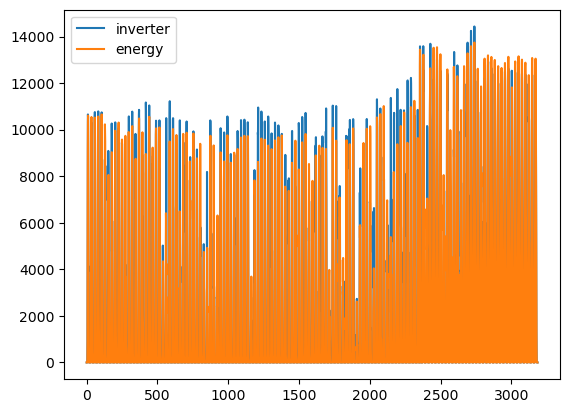

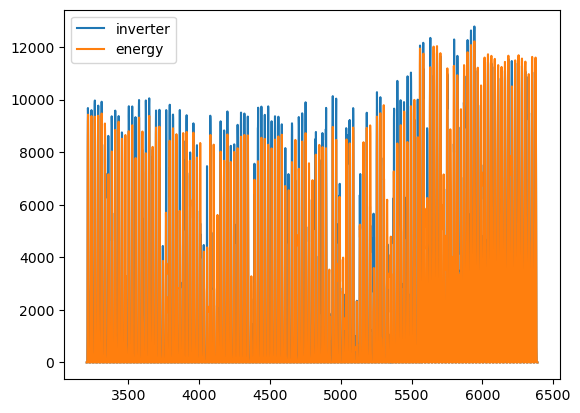

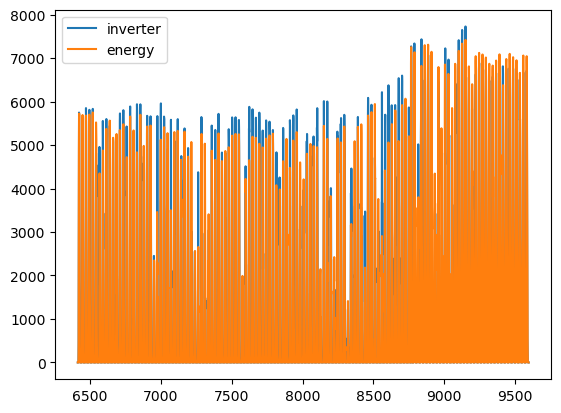

In [97]:
p = df.copy()
p1 = df[df['id']=='inverter1']
p2 = df[df['id']=='inverter2']
p3 = df[df['id']=='inverter3']

print('GENERAL')
metric(p['inverter'],p['energy'])
print('\n')
print('INVERTER1')
metric(p1['inverter'],p1['energy'])
print('\n')
print('INVERTER2')
metric(p2['inverter'],p2['energy'])
print('\n')
print('INVERTER3')
metric(p3['inverter'],p3['energy'])

p1[['inverter','energy']].plot()
p2[['inverter','energy']].plot()
p3[['inverter','energy']].plot()

<Axes: >

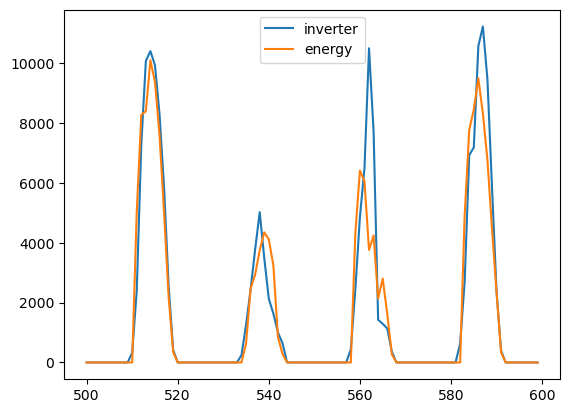

In [98]:
p1[['inverter','energy']][500:600].plot()

<Axes: >

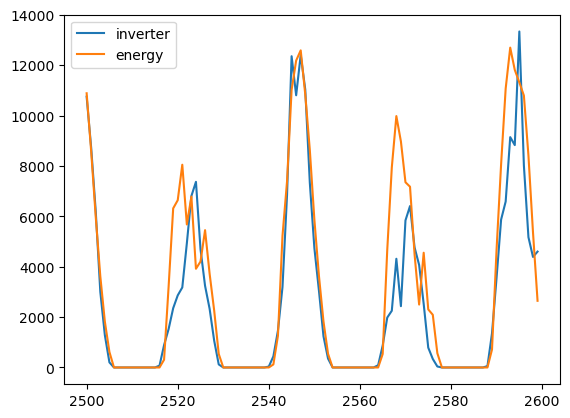

In [99]:
p1[['inverter','energy']][2500:2600].plot()

<Axes: >

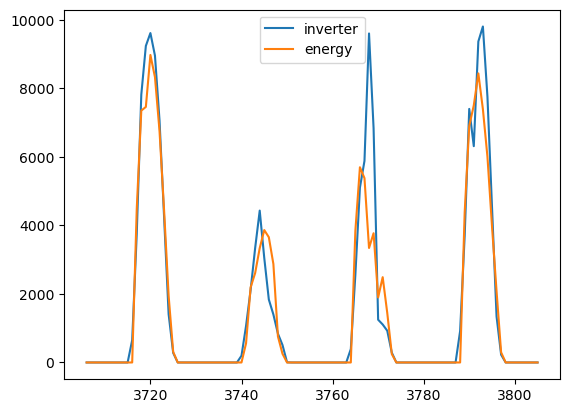

In [100]:
p2[['inverter','energy']][500:600].plot()

<Axes: >

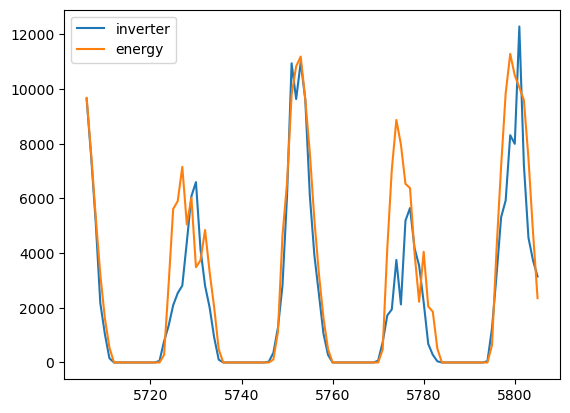

In [101]:
p2[['inverter','energy']][2500:2600].plot()

<Axes: >

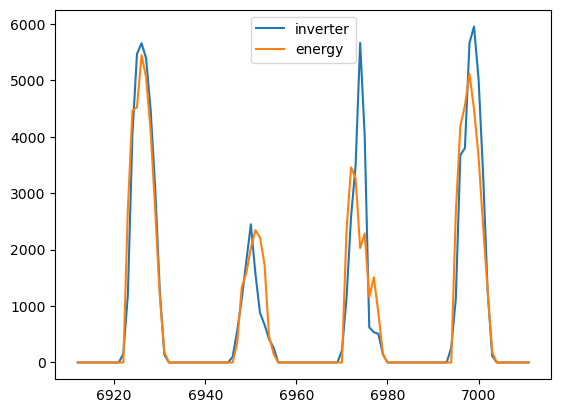

In [102]:
p3[['inverter','energy']][500:600].plot()

<Axes: >

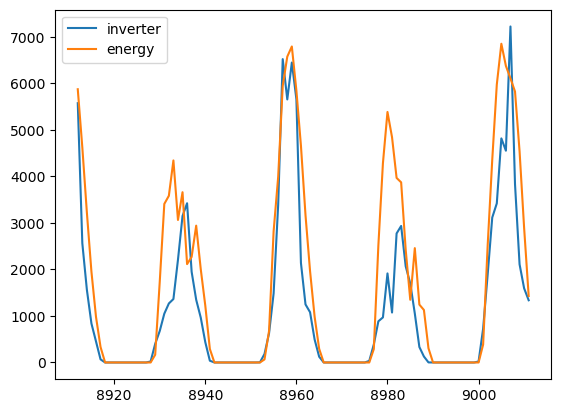

In [103]:
p3[['inverter','energy']][2500:2600].plot()

# Optuna for energy model - tune fewer parameters - only 3 - FINAL

In [27]:
def metric(y_true, y_pred):
    mape = (np.abs(y_pred - y_true) / np.abs(y_true)).map(lambda x: 0 if math.isnan(x) else x)
    mape = mape.map(lambda x: 1 if math.isinf(x) else x)
    res = 100 * np.mean(mape)
                        #.map(lambda x: x if x<100 else 0))
    
    print(f"MAPE ML Model: {res}")   
    
    res = 100 * np.mean((np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))).map(lambda x: 0 if math.isnan(x) else x))
                        #.map(lambda x: x if x<100 else 0))
    
    print(f"SMAPE ML Model: {res}")   

In [28]:
def calculate_energy(DNI, DHI, GHI, thz, gs, air_temp, panel_size, panel_age, performance_ratio, system_losses, g) :
    
    b = 17 # surface tilt angle in degrees
    #g = -39 # surface azimuth angle in degrees
    albedo = 0.2 # ground reflectance (default value)
    
    # Convert degrees to radians
    thz_rad = math.radians(thz)
    b_rad = math.radians(b)
    gs_rad = math.radians(gs)
    g_rad = math.radians(g)
    
    # Calculate the angle of incidence th
    cos_th = (math.sin(thz_rad) * math.cos(gs_rad - g_rad) * math.sin(b_rad) + math.cos(thz_rad) * math.cos(b_rad))
    
    # Ensure cos_th is within the valid range
    cos_th = max(0, min(cos_th, 1))
    
    # Direct component
    Gpoa_direct = DNI * cos_th
    
    # Diffuse component (assumed isotropic)
    Gpoa_diffuse = DHI * (1 + math.cos(b_rad)) / 2
    
    # Reflected component
    Gpoa_reflected = GHI * albedo * (1 - math.cos(b_rad)) / 2
    
    # Total Gpoa
    Gpoa = Gpoa_direct + Gpoa_diffuse + Gpoa_reflected
    
    # Global constants
    Eo = 1000  # Reference Irradiance (W/m²)
    To = 25  # Reference Temperature (°C)
    g = -0.0042  # Power Temperature Coefficient (%/°C)
    Pmp0 = 270  # PV module rated power (Wp)
    
    # Derating factors
    Soiling = 1
    Shading = 0
    Snow = 0
    Mismatch = 1
    Wiring = 1
    Connections = 0.5
    LID = 0
    Nameplate = 1
    Age = panel_age
    Availability = 3
    a = -3.47  # Thermal Properties Isc (%/K)
    b = -0.0594  # Thermal Properties Voc (%/K)
    
    # NOCT (Nominal Operating Cell Temperature)
    NOCT = 48
    
    # Insolation in mW/cm²
    S = 80
    
    # Calculate derating factor
    Deratingfactor = (Soiling + Shading + Snow + Mismatch + Wiring + Connections + 
                      LID + Nameplate + Age + Availability + a + b)
    
    # Calculate module temperature
    Tm = air_temp + ((NOCT - 20) / 80) * S
    
    # Calculate predicted power production
    if Gpoa >= 125:
        p = ((Gpoa / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    else:
        p = ((0.008 * (Gpoa ** 2) / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    
    if p < 1:
        p = 0
    
    # System losses and performance ratio adjustments
    s1 = (100 - system_losses) / 100
    s2 = 1 - ((100 - performance_ratio) / 100)
    
    # Calculate energy output
    energy = panel_size * p * s1 * s2
    
    return energy

def calculate_energy(DNI, DHI, GHI, thz, gs, air_temp, panel_size, performance_ratio, system_losses, g, 
                     nameplate, inverter_transformer, mismatch, connections, dc_wiring, ac_wiring, soiling, availability, shading, sun_tracking, age):
    
    derating_factor = nameplate*inverter_transformer*mismatch*connections*dc_wiring*ac_wiring*soiling*availability*shading*sun_tracking*age
        
    b = 17 # surface tilt angle in degrees
    #g = -39 # surface azimuth angle in degrees
    albedo = 0.2 # ground reflectance (default value)
    
    # Convert degrees to radians
    thz_rad = math.radians(thz)
    b_rad = math.radians(b)
    gs_rad = math.radians(gs)
    g_rad = math.radians(g)
    
    # Calculate the angle of incidence th
    cos_th = (math.sin(thz_rad) * math.cos(gs_rad - g_rad) * math.sin(b_rad) + math.cos(thz_rad) * math.cos(b_rad))
    
    # Ensure cos_th is within the valid range
    cos_th = max(0, min(cos_th, 1))
    
    # Direct component
    Gpoa_direct = DNI * cos_th
    
    # Diffuse component (assumed isotropic)
    Gpoa_diffuse = DHI * (1 + math.cos(b_rad)) / 2
    
    # Reflected component
    Gpoa_reflected = GHI * albedo * (1 - math.cos(b_rad)) / 2
    
    # Total Gpoa
    Gpoa = Gpoa_direct + Gpoa_diffuse + Gpoa_reflected
    
    # Global constants
    Eo = 1000  # Reference Irradiance (W/m²)
    To = 25  # Reference Temperature (°C)
    g = -0.0042  # Power Temperature Coefficient (%/°C)
    Pmp0 = 270  # PV module rated power (Wp)
    
    # NOCT (Nominal Operating Cell Temperature)
    NOCT = 48
    
    # Insolation in mW/cm²
    S = 80
    
    # Calculate module temperature
    Tm = air_temp + ((NOCT - 20) / 80) * S
    
    # Calculate predicted power production
    if Gpoa >= 125:
        p = ((Gpoa / Eo) * Pmp0 * (1 + g * (Tm - To))) * derating_factor
    else:
        p = ((0.008 * (Gpoa ** 2) / Eo) * Pmp0 * (1 + g * (Tm - To))) * derating_factor
    
    if p < 1:
        p = 0
    
    # System losses and performance ratio adjustments
    s1 = (100 - system_losses) / 100
    s2 = 1 - ((100 - performance_ratio) / 100)
    
    # Calculate energy output
    energy = panel_size * p * s1 * s2
    
    return energy

In [29]:
def smape(y_true,y_pred) :
    return 100 * np.mean((np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))).map(lambda x: 0 if math.isnan(x) else x))

In [30]:
def _(doc):
    return doc

def objective(trial):
    
    performance_ratio = trial.suggest_float('performance_ratio', 70, 100) # = 79.26 # (%)
    system_losses = trial.suggest_float('system_losses', 5, 20) # = 12 # (%) around x% (10.7+3.6, 10.7+2.7, 5.9+3.6)
    
    g = trial.suggest_int('g', -180, 180)
    
    #nameplate = trial.suggest_float('nameplate', 0.80, 1.05)
    #inverter_transformer = trial.suggest_float('inverter_transformer', 0.88, 0.98)
    #mismatch = trial.suggest_float('mismatch', 0.97, 0.995)
    #connections = trial.suggest_float('connections', 0.99, 0.997)
    #dc_wiring = trial.suggest_float('dc_wiring', 0.97, 0.99)
    #ac_wiring = trial.suggest_float('ac_wiring', 0.98, 0.993)
    #soiling = trial.suggest_float('soiling', 0.30, 0.995)
    #availability = trial.suggest_float('availability', 0, 0.995)
    #shading = trial.suggest_float('shading', 0, 1)
    #sun_tracking = trial.suggest_float('sun_tracking', 0.95, 1)
    #age = trial.suggest_float('age', 0.70, 1)
    
    df['energy'] = df.apply(lambda x: calculate_energy(x['direct_normal_irradiance (W/m²)'], 
                                                       x['diffuse_radiation (W/m²)'], x['shortwave_radiation (W/m²)'], 
                                                       x['zenith'], x['azimuth'], x['temperature_2m (°C)'],
                                                       x['panel_size'], panel_age=5, performance_ratio=performance_ratio, 
                                                       system_losses=system_losses, g=g), axis=1)

    score = smape(df['inverter'],df['energy'])

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500, n_jobs = -1, show_progress_bar=True)

print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-07-10 10:12:06,262] A new study created in memory with name: no-name-9e439868-41a1-4e7d-9d50-7e236d70cada


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-07-10 10:12:08,486] Trial 0 finished with value: 15.281742857310196 and parameters: {'performance_ratio': 90.13647264774625, 'system_losses': 12.110450092275432, 'g': -128}. Best is trial 0 with value: 15.281742857310196.
[I 2024-07-10 10:12:08,813] Trial 2 finished with value: 18.74433438919739 and parameters: {'performance_ratio': 86.080980408903, 'system_losses': 16.14337288712595, 'g': 105}. Best is trial 0 with value: 15.281742857310196.
[I 2024-07-10 10:12:08,908] Trial 1 finished with value: 18.73740388652121 and parameters: {'performance_ratio': 78.51234583794951, 'system_losses': 14.820132457218802, 'g': 95}. Best is trial 0 with value: 15.281742857310196.
[I 2024-07-10 10:12:09,586] Trial 5 finished with value: 18.408297759185714 and parameters: {'performance_ratio': 75.31173504139521, 'system_losses': 7.6183604057535455, 'g': 114}. Best is trial 0 with value: 15.281742857310196.
[I 2024-07-10 10:12:09,870] Trial 3 finished with value: 16.42004607863649 and parameters

[I 2024-07-10 10:12:22,635] Trial 34 finished with value: 14.90372934897956 and parameters: {'performance_ratio': 74.87661706662315, 'system_losses': 13.843826740036105, 'g': -107}. Best is trial 8 with value: 13.649798667157546.
[I 2024-07-10 10:12:22,709] Trial 40 finished with value: 13.854079134955718 and parameters: {'performance_ratio': 73.93859479371565, 'system_losses': 13.814685944597224, 'g': -135}. Best is trial 8 with value: 13.649798667157546.
[I 2024-07-10 10:12:23,074] Trial 36 finished with value: 15.435349790163697 and parameters: {'performance_ratio': 72.78560339524338, 'system_losses': 13.571407280292297, 'g': -94}. Best is trial 8 with value: 13.649798667157546.
[I 2024-07-10 10:12:23,567] Trial 39 finished with value: 13.635835827675747 and parameters: {'performance_ratio': 73.14717292293868, 'system_losses': 13.753571975813355, 'g': -144}. Best is trial 39 with value: 13.635835827675747.
[I 2024-07-10 10:12:23,788] Trial 42 finished with value: 14.247951315814388 

[I 2024-07-10 10:12:36,825] Trial 73 finished with value: 14.408203796232492 and parameters: {'performance_ratio': 83.62055179488219, 'system_losses': 15.648467038486483, 'g': -156}. Best is trial 52 with value: 13.590259215698772.
[I 2024-07-10 10:12:37,233] Trial 74 finished with value: 14.695503888835848 and parameters: {'performance_ratio': 84.21866850541267, 'system_losses': 12.875041674825749, 'g': -124}. Best is trial 52 with value: 13.590259215698772.
[I 2024-07-10 10:12:38,639] Trial 78 finished with value: 14.759909700421654 and parameters: {'performance_ratio': 83.828288156886, 'system_losses': 12.824664238965674, 'g': -154}. Best is trial 52 with value: 13.590259215698772.
[I 2024-07-10 10:12:38,662] Trial 77 finished with value: 14.603305924768344 and parameters: {'performance_ratio': 83.5481553914186, 'system_losses': 14.984617037913116, 'g': -159}. Best is trial 52 with value: 13.590259215698772.
[I 2024-07-10 10:12:39,192] Trial 79 finished with value: 13.69417372884627

[I 2024-07-10 10:13:08,490] Trial 145 finished with value: 13.636963563975119 and parameters: {'performance_ratio': 71.55273867594337, 'system_losses': 16.808775574532433, 'g': -149}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:09,663] Trial 149 finished with value: 16.07396999415755 and parameters: {'performance_ratio': 97.92803420970453, 'system_losses': 16.85532572925528, 'g': -149}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:09,806] Trial 147 finished with value: 13.582709972368534 and parameters: {'performance_ratio': 71.52517490199105, 'system_losses': 15.07197593226194, 'g': -151}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:10,541] Trial 150 finished with value: 13.579109245809166 and parameters: {'performance_ratio': 72.58121724261436, 'system_losses': 15.057004227148312, 'g': -150}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:10,541] Trial 148 finished with value: 16.61724

[I 2024-07-10 10:13:25,112] Trial 181 finished with value: 14.404358419152341 and parameters: {'performance_ratio': 74.23752791499152, 'system_losses': 16.028191213200568, 'g': -177}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:25,239] Trial 179 finished with value: 14.002413061981493 and parameters: {'performance_ratio': 74.65004817879932, 'system_losses': 15.983394907395514, 'g': -170}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:25,397] Trial 183 finished with value: 14.653362179716467 and parameters: {'performance_ratio': 74.5153825396318, 'system_losses': 16.017699812659995, 'g': -180}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:25,641] Trial 184 finished with value: 14.66193777163265 and parameters: {'performance_ratio': 74.6683936579222, 'system_losses': 16.0654825904146, 'g': -180}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:26,347] Trial 182 finished with value: 14.6530905

[I 2024-07-10 10:13:40,996] Trial 221 finished with value: 13.574501830659106 and parameters: {'performance_ratio': 73.9651377457988, 'system_losses': 16.363295476674686, 'g': -151}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:41,560] Trial 215 finished with value: 13.600382740518535 and parameters: {'performance_ratio': 73.740273618678, 'system_losses': 15.592530670648046, 'g': -147}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:42,062] Trial 220 finished with value: 13.737070398174959 and parameters: {'performance_ratio': 71.1197599851013, 'system_losses': 6.904560197013078, 'g': -150}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:42,187] Trial 218 finished with value: 13.586987962277691 and parameters: {'performance_ratio': 73.90627357652765, 'system_losses': 14.961653163487243, 'g': -150}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:44,831] Trial 223 finished with value: 13.5791193

[I 2024-07-10 10:13:56,266] Trial 250 finished with value: 13.940537719858265 and parameters: {'performance_ratio': 73.94827902578818, 'system_losses': 17.20357885757567, 'g': -134}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:56,361] Trial 255 finished with value: 13.604464857310147 and parameters: {'performance_ratio': 74.08615608095273, 'system_losses': 15.060227019432215, 'g': -156}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:56,730] Trial 253 finished with value: 13.59042565351731 and parameters: {'performance_ratio': 74.11863936071167, 'system_losses': 15.834677829177188, 'g': -156}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:57,277] Trial 251 finished with value: 13.829381767302687 and parameters: {'performance_ratio': 73.9444343160511, 'system_losses': 15.82687810843541, 'g': -136}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:13:57,531] Trial 257 finished with value: 13.579911

[I 2024-07-10 10:14:13,631] Trial 288 finished with value: 13.997517634432308 and parameters: {'performance_ratio': 76.05446616733053, 'system_losses': 17.626195668682413, 'g': -170}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:13,835] Trial 289 finished with value: 15.515714577527499 and parameters: {'performance_ratio': 73.29476602175473, 'system_losses': 8.77527451249578, 'g': -87}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:14,012] Trial 294 finished with value: 13.721306440823886 and parameters: {'performance_ratio': 76.88869421420617, 'system_losses': 16.836544364745425, 'g': -160}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:14,043] Trial 293 finished with value: 16.28110273984083 and parameters: {'performance_ratio': 72.33941529333298, 'system_losses': 16.7796879272715, 'g': -78}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:14,139] Trial 295 finished with value: 13.886485409

[I 2024-07-10 10:14:28,707] Trial 330 finished with value: 13.666175767904335 and parameters: {'performance_ratio': 73.09397536682813, 'system_losses': 15.443107760746322, 'g': -162}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:29,404] Trial 331 finished with value: 15.405997910237195 and parameters: {'performance_ratio': 86.55360708581497, 'system_losses': 14.57575192590421, 'g': -165}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:29,788] Trial 326 finished with value: 13.943650332986795 and parameters: {'performance_ratio': 75.6328220770062, 'system_losses': 14.481560116391448, 'g': -165}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:29,866] Trial 329 finished with value: 14.962787479955745 and parameters: {'performance_ratio': 85.44731418349548, 'system_losses': 15.611896911449199, 'g': -163}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:30,348] Trial 327 finished with value: 13.7311

[I 2024-07-10 10:14:44,242] Trial 359 finished with value: 13.616771207008052 and parameters: {'performance_ratio': 74.52844545133293, 'system_losses': 15.08825503552451, 'g': -156}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:44,334] Trial 368 finished with value: 13.58727583069434 and parameters: {'performance_ratio': 71.59242787524443, 'system_losses': 15.037166638586278, 'g': -157}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:44,826] Trial 364 finished with value: 13.589773785395945 and parameters: {'performance_ratio': 71.41297490719967, 'system_losses': 15.246050865765207, 'g': -157}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:44,956] Trial 366 finished with value: 13.581485645075597 and parameters: {'performance_ratio': 71.21965428917203, 'system_losses': 14.854699255672427, 'g': -156}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:14:45,285] Trial 367 finished with value: 13.5836

[I 2024-07-10 10:14:59,101] Trial 405 finished with value: 13.671656716218308 and parameters: {'performance_ratio': 70.155139732945, 'system_losses': 16.287686650317525, 'g': -150}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:15:01,096] Trial 401 finished with value: 13.583706327228558 and parameters: {'performance_ratio': 72.96257120160219, 'system_losses': 16.30059384637345, 'g': -150}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:15:01,741] Trial 404 finished with value: 13.668636598864559 and parameters: {'performance_ratio': 70.52575861044973, 'system_losses': 16.429542198380602, 'g': -149}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:15:02,150] Trial 407 finished with value: 13.629356540382492 and parameters: {'performance_ratio': 71.53599175838121, 'system_losses': 16.392161610248053, 'g': -160}. Best is trial 110 with value: 13.567958744903466.
[I 2024-07-10 10:15:02,197] Trial 400 finished with value: 13.58832

[I 2024-07-10 10:15:14,192] Trial 434 finished with value: 13.602291117873486 and parameters: {'performance_ratio': 73.13433424501662, 'system_losses': 15.906292150110692, 'g': -147}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:15,818] Trial 437 finished with value: 13.611157420893552 and parameters: {'performance_ratio': 73.38589065074201, 'system_losses': 16.005189549395364, 'g': -146}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:16,737] Trial 442 finished with value: 13.816394522490258 and parameters: {'performance_ratio': 73.34988125435324, 'system_losses': 15.89886546100828, 'g': -167}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:16,813] Trial 439 finished with value: 13.602746367582274 and parameters: {'performance_ratio': 73.15149979321086, 'system_losses': 15.983528774192193, 'g': -147}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:16,829] Trial 441 finished with value: 13.601

[I 2024-07-10 10:15:30,315] Trial 468 finished with value: 13.596888094357912 and parameters: {'performance_ratio': 74.59965421684534, 'system_losses': 15.566481933765388, 'g': -155}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:30,471] Trial 471 finished with value: 19.461800211262297 and parameters: {'performance_ratio': 73.77066258886468, 'system_losses': 18.31904534247701, 'g': 59}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:30,549] Trial 477 finished with value: 13.747549921721895 and parameters: {'performance_ratio': 73.92846353585055, 'system_losses': 19.567581625371094, 'g': -166}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:30,819] Trial 474 finished with value: 19.357267373068673 and parameters: {'performance_ratio': 73.87882268636287, 'system_losses': 15.645788465855484, 'g': 65}. Best is trial 429 with value: 13.567953275415787.
[I 2024-07-10 10:15:30,992] Trial 475 finished with value: 13.7527241

In [61]:
df['energy'] = df.apply(lambda x: calculate_energy(x['direct_normal_irradiance (W/m²)'], 
                                                       x['diffuse_radiation (W/m²)'], x['shortwave_radiation (W/m²)'], 
                                                       x['zenith'], x['azimuth'], x['temperature_2m (°C)'],
                                                       x['panel_size'], 5, **best_trial.params), axis=1)

In [62]:
best_trial.params

{'performance_ratio': 73.27524337599934,
 'system_losses': 15.92234017013263,
 'g': -153}

{'performance_ratio': 73.27524337599934,
 'system_losses': 15.92234017013263,
 'g': -153}

GENERAL
MAPE ML Model: 41.10310107102624
SMAPE ML Model: 13.567953275415787


INVERTER1
MAPE ML Model: 24.752218319678963
SMAPE ML Model: 12.98921520061066


INVERTER2
MAPE ML Model: 26.891292079894164
SMAPE ML Model: 13.437163077100825


INVERTER3
MAPE ML Model: 71.66579281350558
SMAPE ML Model: 14.277481548535881


<Axes: >

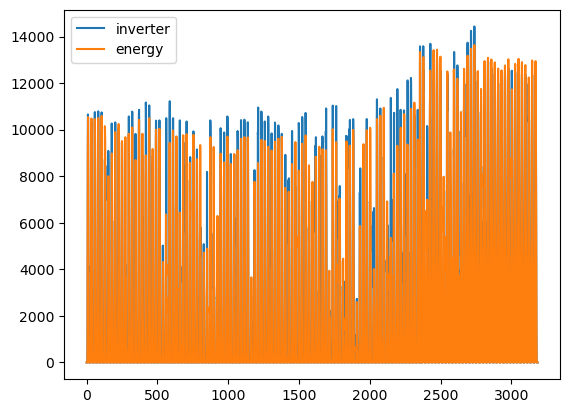

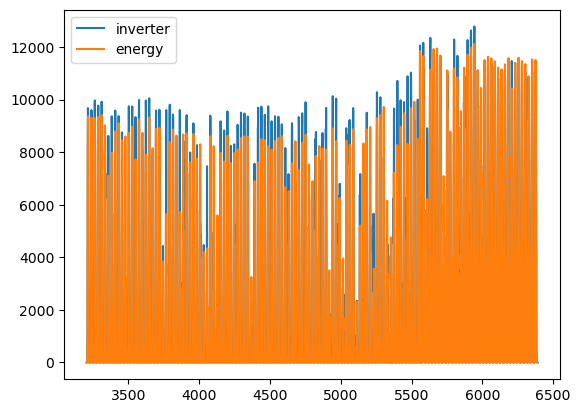

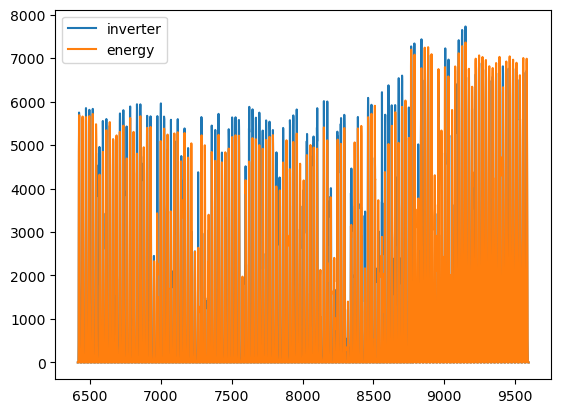

In [63]:
p = df.copy()
p1 = df[df['id']=='inverter1']
p2 = df[df['id']=='inverter2']
p3 = df[df['id']=='inverter3']

print('GENERAL')
metric(p['inverter'],p['energy'])
print('\n')
print('INVERTER1')
metric(p1['inverter'],p1['energy'])
print('\n')
print('INVERTER2')
metric(p2['inverter'],p2['energy'])
print('\n')
print('INVERTER3')
metric(p3['inverter'],p3['energy'])

p1[['inverter','energy']].plot()
p2[['inverter','energy']].plot()
p3[['inverter','energy']].plot()

<Axes: >

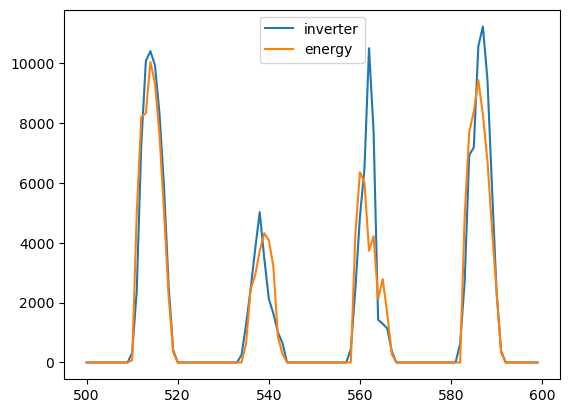

In [52]:
p1[['inverter','energy']][500:600].plot()

<Axes: >

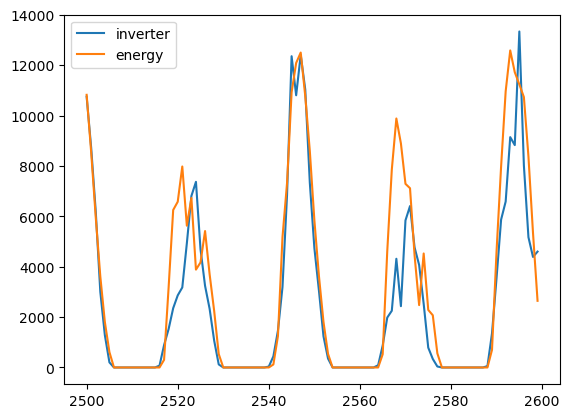

In [53]:
p1[['inverter','energy']][2500:2600].plot()

<Axes: >

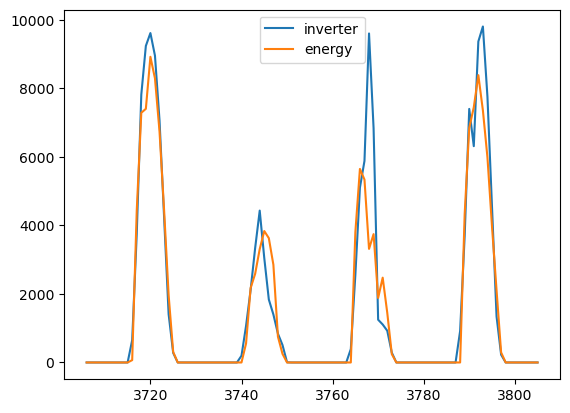

In [54]:
p2[['inverter','energy']][500:600].plot()

<Axes: >

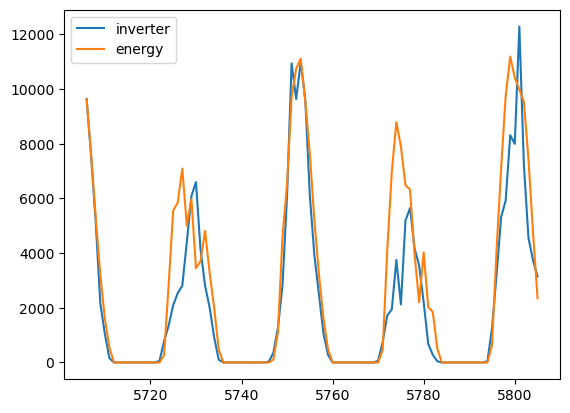

In [55]:
p2[['inverter','energy']][2500:2600].plot()

<Axes: >

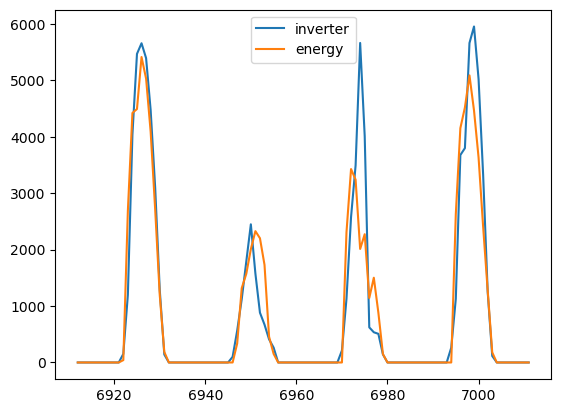

In [56]:
p3[['inverter','energy']][500:600].plot()

<Axes: >

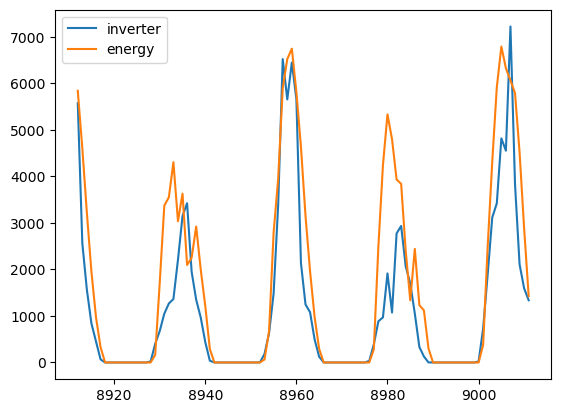

In [57]:
p3[['inverter','energy']][2500:2600].plot()

In [64]:
p

,datetime,inverter,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),...,shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,id,panel_size,energy
0,2023-11-03 02:00:00,0.0,19.6,76.0,20.4,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-67,141,inverter1,107.1,0.0
1,2023-11-03 03:00:00,0.0,19.2,75.0,19.8,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-80,129,inverter1,107.1,0.0
2,2023-11-03 04:00:00,0.0,17.9,80.0,18.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-89,117,inverter1,107.1,0.0
3,2023-11-03 05:00:00,0.0,17.4,75.0,17.6,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-98,105,inverter1,107.1,0.0
4,2023-11-03 06:00:00,0.0,16.9,71.0,17.1,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-106,93,inverter1,107.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024-06-24 22:00:00,0.0,26.6,71.0,28.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28,116,inverter3,57.8,0.0
9593,2024-06-24 23:00:00,0.0,25.9,68.0,27.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14,120,inverter3,57.8,0.0
9594,2024-06-25 00:00:00,0.0,25.2,65.0,26.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2,121,inverter3,57.8,0.0
9595,2024-06-25 01:00:00,0.0,24.8,63.0,25.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-18,119,inverter3,57.8,0.0


In [66]:
p

,datetime,inverter,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),...,shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,id,panel_size,energy
0,2023-11-03 02:00:00,0.0,19.6,76.0,20.4,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-67,141,inverter1,107.1,0.0
1,2023-11-03 03:00:00,0.0,19.2,75.0,19.8,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-80,129,inverter1,107.1,0.0
2,2023-11-03 04:00:00,0.0,17.9,80.0,18.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-89,117,inverter1,107.1,0.0
3,2023-11-03 05:00:00,0.0,17.4,75.0,17.6,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-98,105,inverter1,107.1,0.0
4,2023-11-03 06:00:00,0.0,16.9,71.0,17.1,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-106,93,inverter1,107.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,2024-06-24 22:00:00,0.0,26.6,71.0,28.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28,116,inverter3,57.8,0.0
9593,2024-06-24 23:00:00,0.0,25.9,68.0,27.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14,120,inverter3,57.8,0.0
9594,2024-06-25 00:00:00,0.0,25.2,65.0,26.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2,121,inverter3,57.8,0.0
9595,2024-06-25 01:00:00,0.0,24.8,63.0,25.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-18,119,inverter3,57.8,0.0


In [67]:
p.to_csv('data_energy.csv',index=False)